In [1]:
!pip install torch torchaudio librosa transformers matplotlib


  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached audioread-3.1.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached numba-0.63.1-cp313-cp313-win_amd64.whl.metadata (3.0 kB)
  Using cached soundfile-0.13.1-py2.py3-none-win_amd64.whl.metadata (16 kB)
  Using cached soxr-1.0.0-cp312-abi3-win_amd64.whl.metadata (5.6 kB)
  Using cached msgpack-1.1.2-cp313-cp313-win_amd64.whl.metadata (8.4 kB)
  Using cached standard_aifc-3.13.0-py3-none-any.whl.metadata (969 bytes)
  Using cached standard_sunau-3.13.0-py3-none-any.whl.metadata (914 bytes)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached llvmlite-0.46.0-cp313-cp313-win_amd64.whl.metadata (5.1 kB)
  Using cached standard_chunk-3.13.0-py3-none-any.whl.metadata (860 bytes)
  Using cached audioop_lts-0.2.2-cp313-abi3-win_amd64.whl.metadata (2.0 kB)
Using

In [2]:
import torch
import torchaudio
import librosa
import matplotlib.pyplot as plt
import numpy as np


In [3]:
import librosa
import numpy as np

audio_path = "/content/LJ025-0076.wav"

# Load audio directly at 16kHz and mono
waveform, sample_rate = librosa.load(
    audio_path,
    sr=16000,
    mono=True
)

print("Sample Rate:", sample_rate)
print("Audio Length (seconds):", len(waveform) / sample_rate)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5612\1327880498.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  waveform, sample_rate = librosa.load(
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '/content/LJ025-0076.wav'

In [ ]:
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import torch


In [ ]:
processor = Wav2Vec2Processor.from_pretrained(
    "facebook/wav2vec2-base-960h"
)

model = Wav2Vec2ForCTC.from_pretrained(
    "facebook/wav2vec2-base-960h"
)

model.eval()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Wav2Vec2ForCTC(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder)

In [ ]:
inputs = processor(
    waveform,
    sampling_rate=16000,
    return_tensors="pt",
    padding=True
)


In [ ]:
with torch.no_grad():
    logits = model(inputs.input_values).logits


In [ ]:
predicted_ids = torch.argmax(logits, dim=-1)

decoded_output = processor.batch_decode(predicted_ids)

print("Recognized Phonemes / Tokens:")
print(decoded_output[0])


Recognized Phonemes / Tokens:
MANY ANIMALS OF EVEN COMPLEX STRUCTURE WHICH LIVE PARASITICALLY WITHIN OTHERS ARE WHOLLY DEVOID OF AN ALIMENTARY CAVITY


In [ ]:
token_ids = predicted_ids[0].cpu().numpy()
tokens = processor.tokenizer.convert_ids_to_tokens(token_ids)

print(tokens[:40])   # view first few tokens


['<pad>', '<pad>', 'M', '<pad>', '<pad>', '<pad>', 'A', '<pad>', 'N', 'N', '<pad>', '<pad>', 'Y', '<pad>', '|', '|', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', 'A', '<pad>', 'N', 'N', '<pad>', 'I', 'I', 'M', 'M', '<pad>', '<pad>', '<pad>', 'A', 'L', 'L', '<pad>', '<pad>']


In [ ]:
num_frames = logits.shape[1]
frame_duration = len(waveform) / num_frames

print("Frame duration (samples per frame):", frame_duration)


Frame duration (samples per frame): 320.6372315035799


In [ ]:
target_phoneme = "T"

indices = [i for i, t in enumerate(tokens) if t == target_phoneme]

start_frame = indices[0]
end_frame = indices[-1]

start_sample = int(start_frame * frame_duration)
end_sample = int(end_frame * frame_duration)

phoneme_waveform = waveform[start_sample:end_sample]


In [ ]:
import soundfile as sf

sf.write("phoneme_T.wav", phoneme_waveform, 16000)


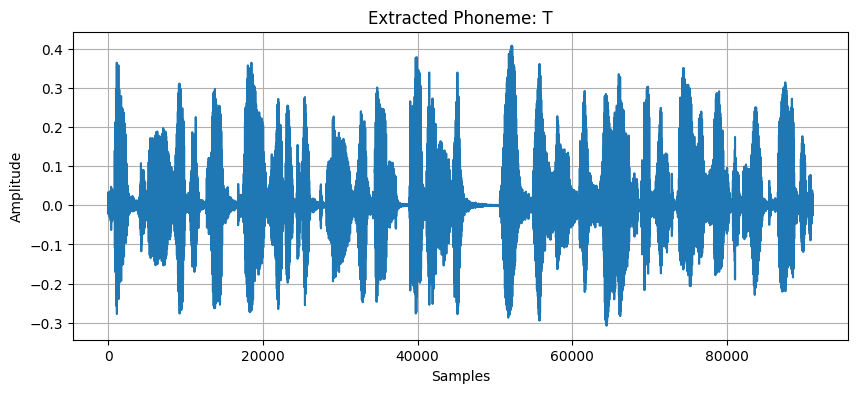

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(phoneme_waveform)
plt.title("Extracted Phoneme: T")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


In [ ]:
phonemes_to_extract = ["T", "EH", "S"]

extracted = {}

for p in phonemes_to_extract:
    idx = [i for i, t in enumerate(tokens) if t == p]
    if len(idx) > 0:
        start = int(idx[0] * frame_duration)
        end = int(idx[-1] * frame_duration)
        extracted[p] = waveform[start:end]


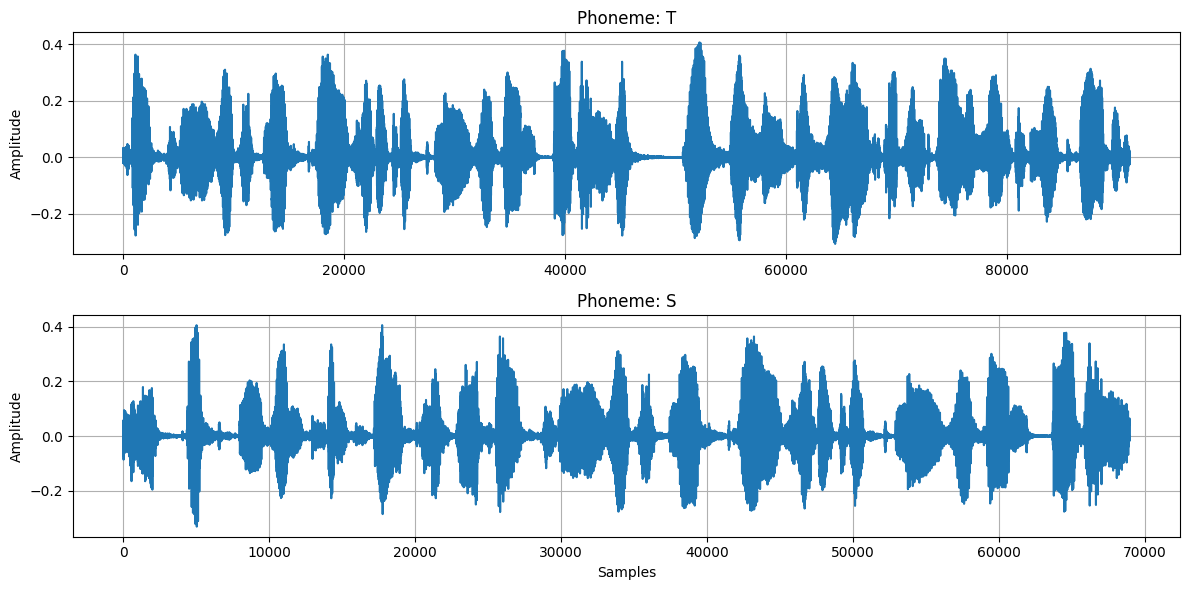

In [ ]:
plt.figure(figsize=(12,6))

for i, (p, w) in enumerate(extracted.items(), 1):
    plt.subplot(len(extracted), 1, i)
    plt.plot(w)
    plt.title(f"Phoneme: {p}")
    plt.ylabel("Amplitude")
    plt.grid(True)

plt.xlabel("Samples")
plt.tight_layout()
plt.show()


In [ ]:
for p, w in extracted.items():
    sf.write(f"phoneme_{p}.wav", w, 16000)
